In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

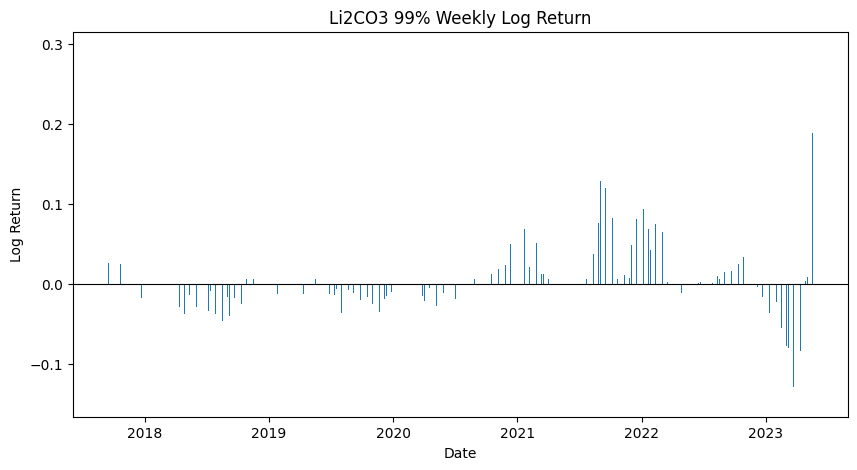

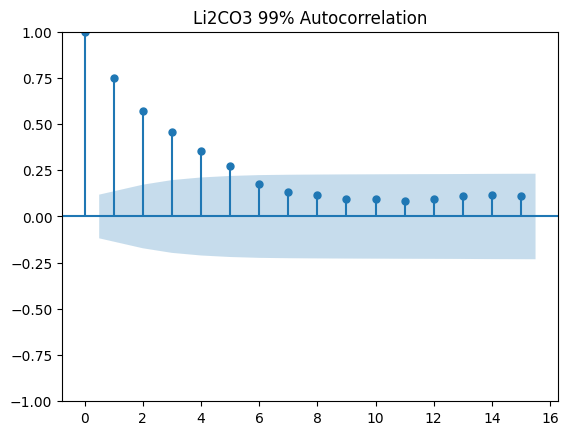

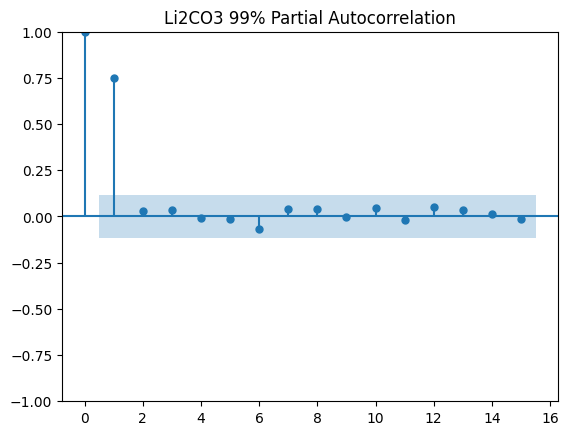

In [6]:
# Li2CO3 99% weekly
li2co3 = pd.read_csv('./Data/Lithium Carbonate (wind database).csv')
li2co3.set_index('Date', inplace = True)
li2co3.rename(columns = {'Li2CO3 99%': 'Price'}, inplace = True)

li2co3.index = pd.to_datetime(li2co3.index)
li2co3.replace(to_replace = 0, method = 'ffill', inplace = True) # fill 0 with previous value
li2co3 = li2co3[li2co3.index.dayofweek == 4] # Friday
li2co3 = li2co3[li2co3.index.isin(pd.date_range('2017-09-08', '2023-05-22'))] # Date range

li2co3['log_ret'] = np.log(li2co3.Price).diff() # Weekly log return
li2co3 = li2co3.tail(-1) # Delete first row (log_ret = NaN)

# li2co3.to_csv('Li2CO3_wind.csv')
# display(li2co3)

fig, axs = plt.subplots(1, 1, figsize =(10, 5))
axs.bar(li2co3.index, li2co3.log_ret, width = 1.5)
plt.axhline(0, linewidth = 0.8, color = 'k')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('Li2CO3 99% Weekly Log Return')
plt.show()

acf = plot_acf(li2co3['log_ret'], lags=15, alpha=0.05, title='Li2CO3 99% Autocorrelation')
pacf = plot_pacf(li2co3['log_ret'], lags=15, alpha=0.05, method='ywm', title='Li2CO3 99% Partial Autocorrelation')

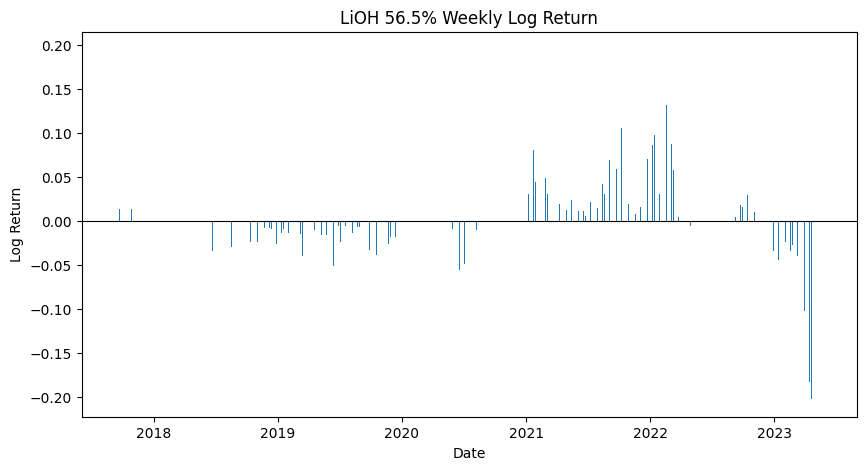

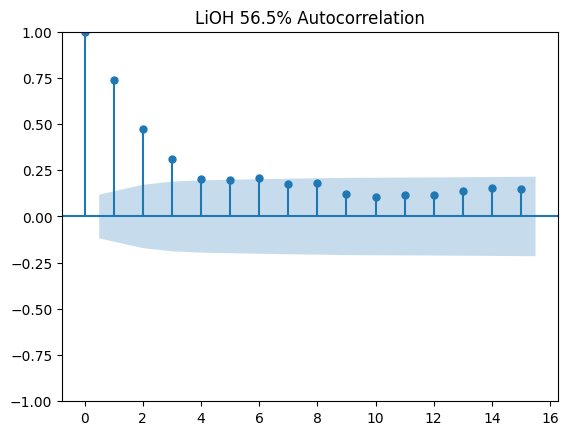

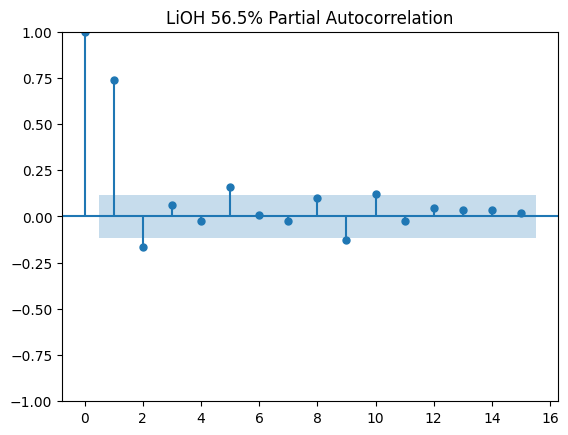

In [7]:
# LiOH 56.5% weekly
lioh = pd.read_csv('./Data/Lithium Hydroxide (wind database).csv')
lioh.set_index('Date', inplace = True)
lioh.rename(columns = {'LiOH 56.5%': 'Price'}, inplace = True)

lioh.index = pd.to_datetime(lioh.index)
lioh.replace(to_replace = 0, method = 'ffill', inplace = True) # fill 0 with previous value i.e. Fri missing use Thu
lioh = lioh[lioh.index.dayofweek == 4] # Friday
lioh = lioh[lioh.index.isin(pd.date_range('2017-09-08', '2023-05-22'))] # Date range

lioh['log_ret'] = np.log(lioh.Price).diff() # Weekly log return
lioh = lioh.tail(-1) # Delete first row (log_ret = NaN)

# lioh.to_csv('LiOH_wind.csv')
# display(lioh)

fig, axs = plt.subplots(1, 1, figsize =(10, 5))
axs.bar(lioh.index, lioh.log_ret, width = 1.5)
plt.axhline(0, linewidth = 0.8, color = 'k')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('LiOH 56.5% Weekly Log Return')
plt.show()

acf = plot_acf(lioh['log_ret'], lags=15, alpha=0.05, title='LiOH 56.5% Autocorrelation')
pacf = plot_pacf(lioh['log_ret'], lags=15, alpha=0.05, method='ywm', title='LiOH 56.5% Partial Autocorrelation')

In [8]:
def str_to_num(s):
    s = str(s).replace(',','')
    if 'M' in s:
        return float(s.replace('M','')) * 1e6
    if 'K' in s:
        return float(s.replace('K','')) * 1e3
    return float(s)

,Price,log_ret
Date,,
2017-09-15,140500,0.021584
2017-09-22,142500,0.014135
2017-09-29,142500,0.000000
2017-10-13,142500,0.000000
2017-10-20,146500,0.027683
...,...,...
2023-04-21,205000,-0.202443
2023-04-28,187500,-0.089231
2023-05-05,187500,0.000000


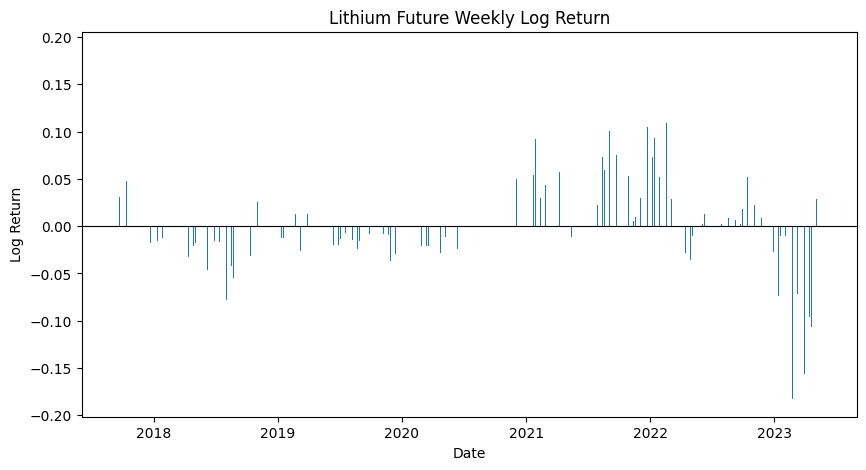

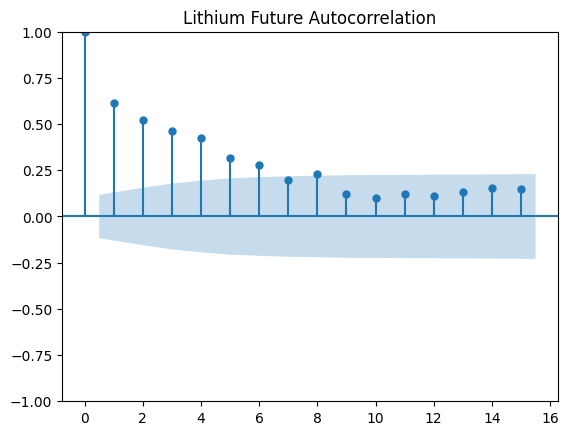

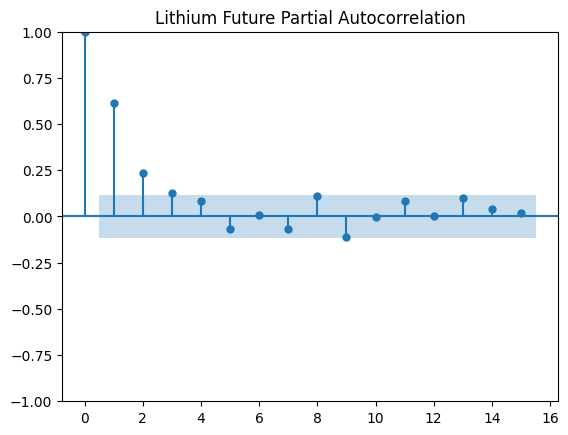

In [9]:
# Lithium Future (Seeking Alpha)

li_future = pd.read_excel('./Data/Historical Prices (9).xlsx', usecols=[0,4])
li_future['Date'] = li_future['Date'].str.replace(',','')
li_future['Date'] = li_future['Date'].str.replace('.','')
li_future.set_index('Date', inplace =True)
li_future.rename(columns = {'Close': 'Price'}, inplace = True)
li_future.index = pd.to_datetime(li_future.index, format = '%b %d %Y')
li_future = li_future.sort_index()
li_future['Price'] = li_future['Price'].apply(str_to_num)
li_future.replace(to_replace = 0, method = 'ffill', inplace = True) # fill 0 with previous value i.e. Fri missing use Thu
li_future = li_future[li_future.index.dayofweek == 4]
li_future = li_future[li_future.index.isin(pd.date_range('2017-09-08', '2023-05-22'))]

li_future['log_ret'] = np.log(li_future.Price).diff() # Weekly log return
li_future = li_future.tail(-1) # Delete first row (log_ret = NaN)


# li_future.to_csv('li_future.csv')
display(lioh)

fig, axs = plt.subplots(1, 1, figsize =(10, 5))
axs.bar(li_future.index, li_future.log_ret, width = 1.5)
plt.axhline(0, linewidth = 0.8, color = 'k')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('Lithium Future Weekly Log Return')
plt.show()

acf = plot_acf(li_future['log_ret'], lags=15, alpha=0.05, title='Lithium Future Autocorrelation')
pacf = plot_pacf(li_future['log_ret'], lags=15, alpha=0.05, method='ywm', title='Lithium Future Partial Autocorrelation')


Lithium Carbonate (Li2CO3) 99% Min China Spot:
- File: 99C-LTCB.csv
- Source: Investing.com
- URL: https://www.investing.com/commodities/lithium-carbonate-99-min-china-futures-historical-data
- Currency: CNY
- Available times: since 2009-05-01


Lithium Carbonate (Li2CO3) 99.5% Min China Spot:
- File: 995C-LTCB.csv
- Source: Investing.com
- URL: https://www.investing.com/commodities/lithium-carbonate-99.5-min-china-futures-historical-data
- Currency: CNY
- Available times: sincd 2011-06-01

Lithium Cobalt Oxide (LiCoO2) 60% Min China Spot:
- File: 60C-LTCX.csv
- Source: Investing.com
- URL: https://www.investing.com/commodities/lithium-cobalt-oxide-60-min-china-futures-historical-data
- Currency: CNY
- Available times: from 2010-04-01

99% Min China Lithium Metal Spot:
- File: 99MIN-LTMT.csv
- Source: Investing.com
- URL: https://www.investing.com/commodities/99-min-china-lithium-metal-futures-historical-data
- Currency: CNY
- Available times: sincd 2015-10-01

99.9% Min China Lithium Metal Spot:
- File: 999MIN-LTMT.csv
- Source: Investing.com
- URL: https://www.investing.com/commodities/99.9-min-china-lithium-metal-futures-historical-data
- Currency: CNY
- Available times: since 2016-07-01

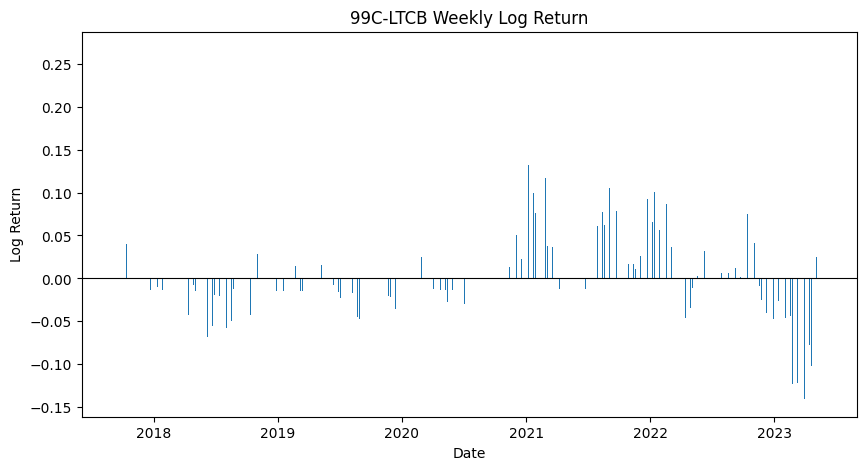

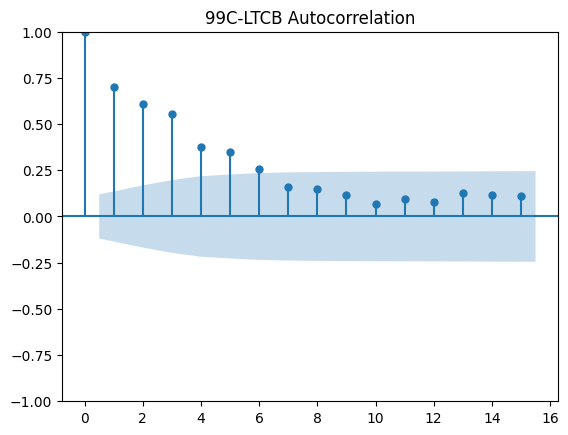

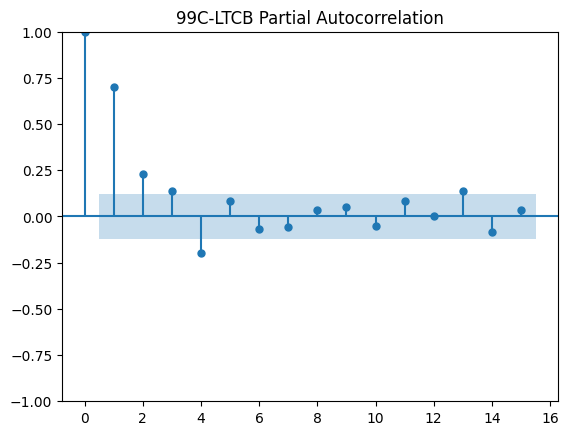

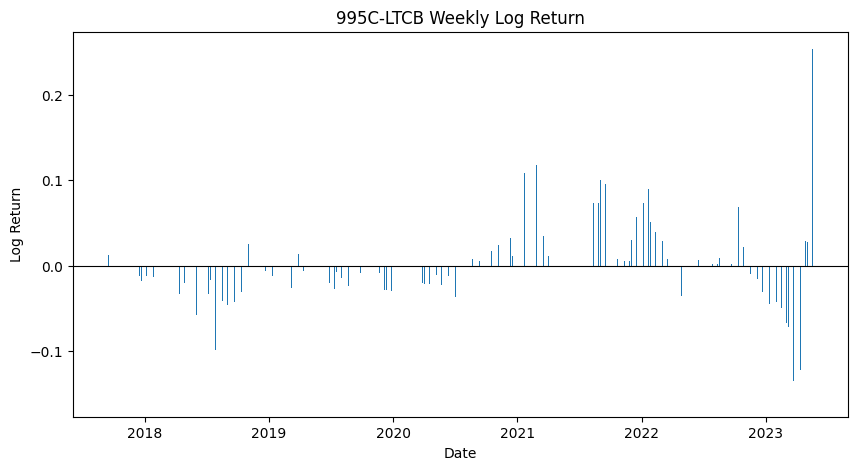

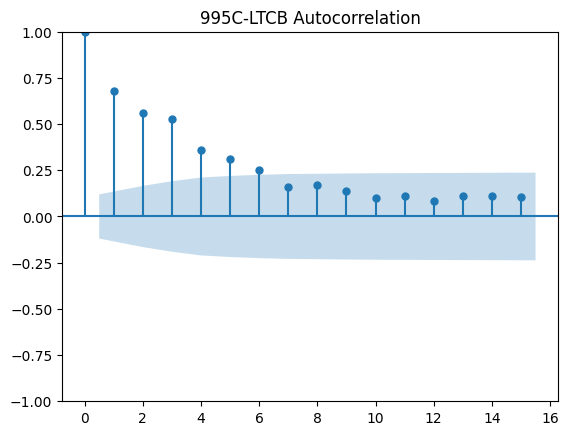

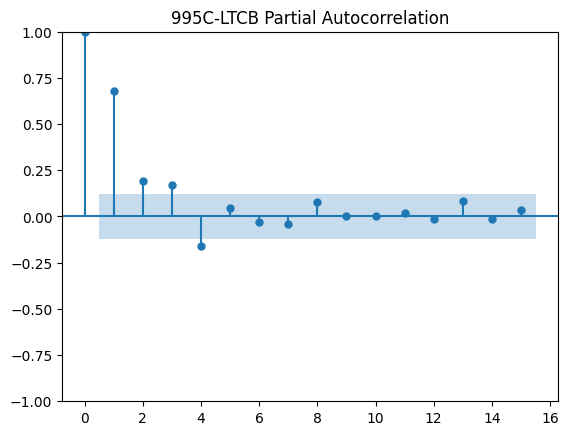

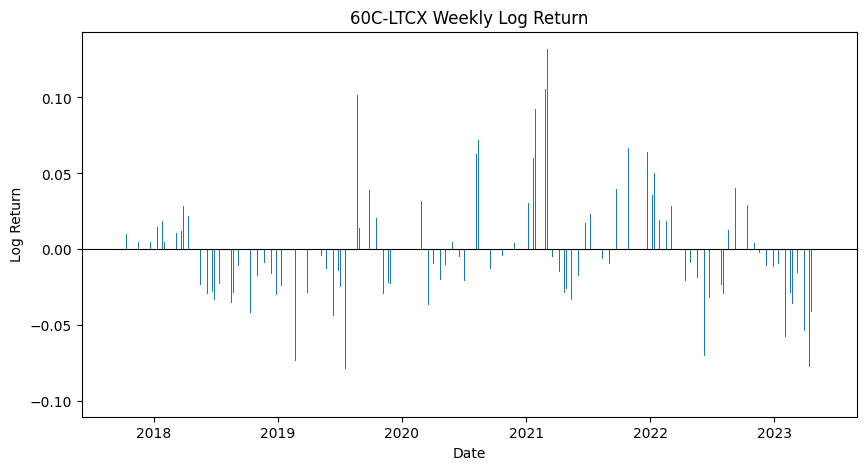

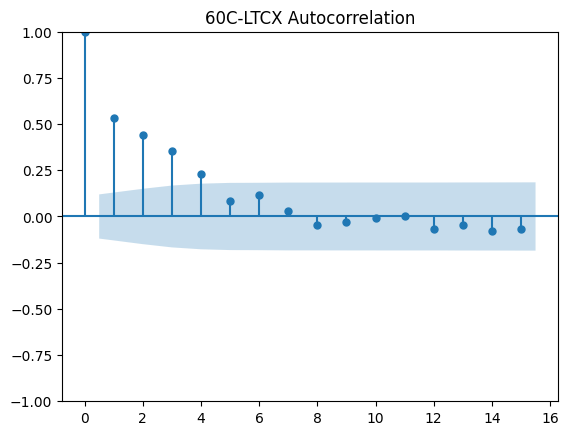

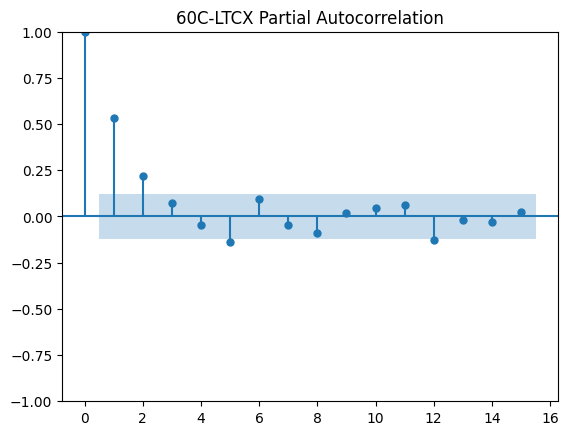

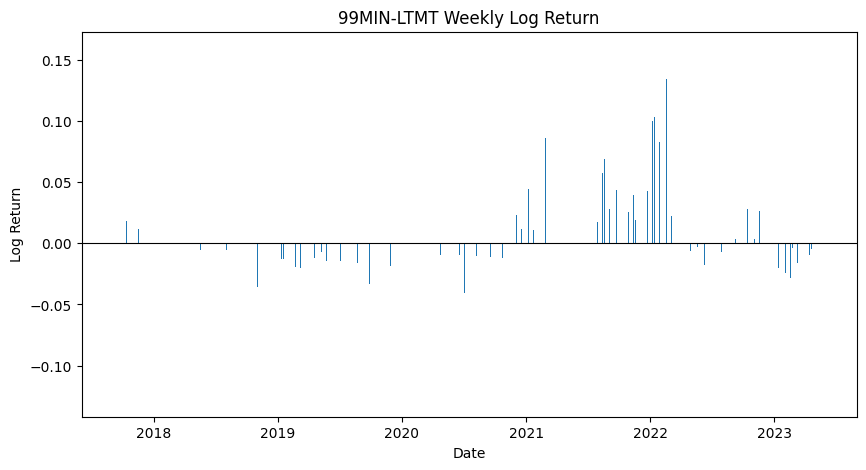

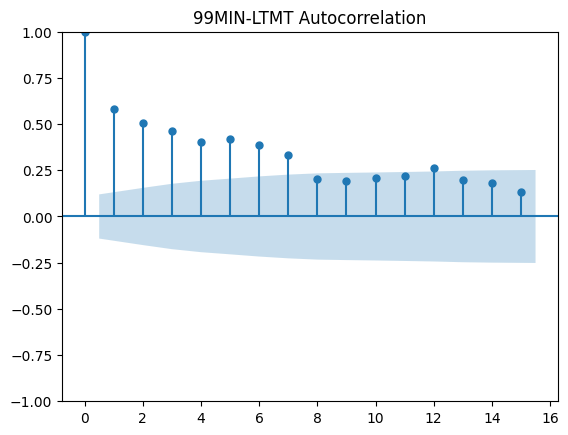

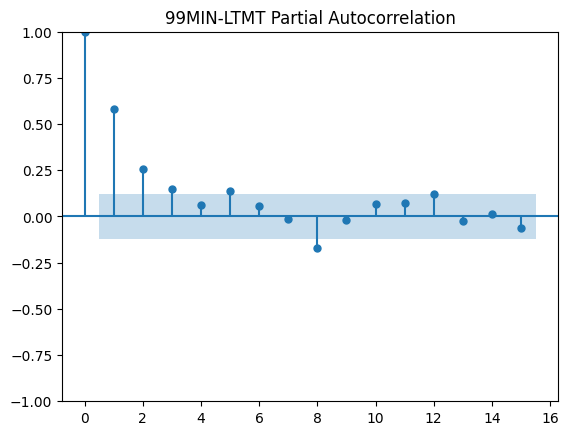

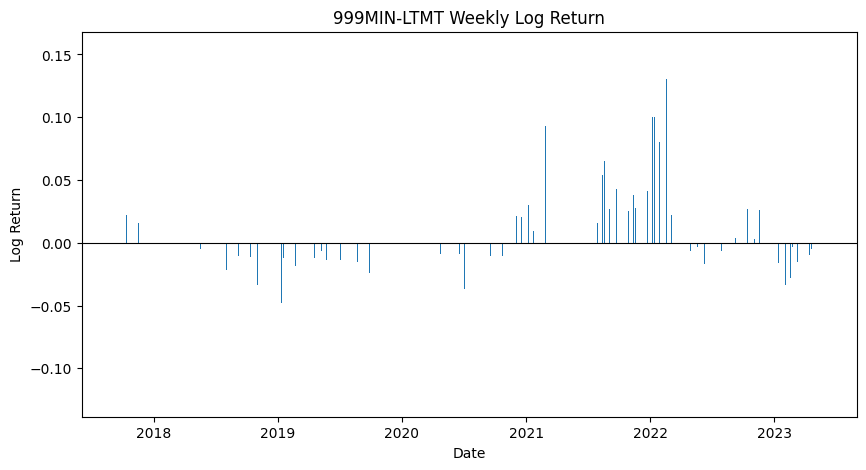

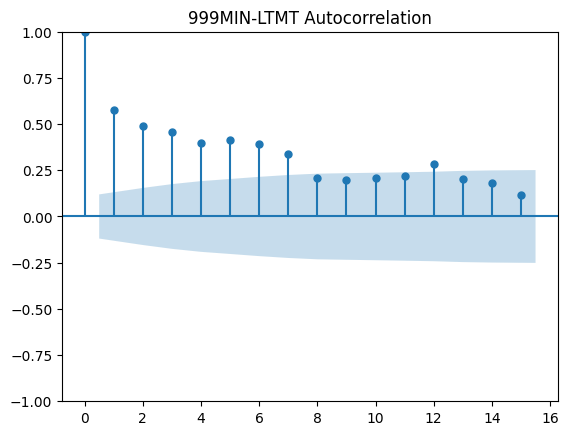

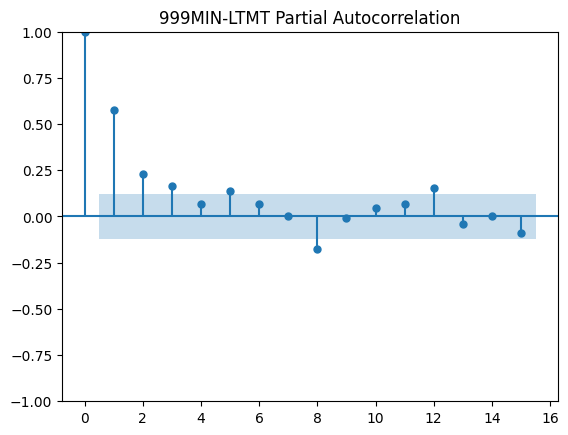

In [10]:
csv_name = ['99C-LTCB','995C-LTCB','60C-LTCX','99MIN-LTMT','999MIN-LTMT']

d = {name: pd.read_csv('./Data/'+name+'.csv', usecols=[0,1]) for name in csv_name}

for df in d:
    d[df].set_index('Date', inplace=True)
    d[df].index = pd.to_datetime(d[df].index)
    d[df] = d[df].sort_index()
    d[df]['Price'] = d[df]['Price'].apply(str_to_num)
    d[df].replace(to_replace = 0, method = 'ffill', inplace = True) # fill 0 with previous value
    d[df] = d[df][d[df].index.dayofweek == 4] # Friday
    d[df] = d[df][d[df].index.isin(pd.date_range('2017-09-08', '2023-05-22'))]

    # d[df].to_csv(df+'.csv')
    # display(d[df])

    d[df]['log_ret'] = np.log(d[df].Price).diff() # Weekly log return
    d[df] = d[df].tail(-1) # Delete first row (log_ret = NaN)

    fig, axs = plt.subplots(1, 1, figsize =(10, 5))
    axs.bar(d[df].index, d[df].log_ret, width = 1.5)
    plt.axhline(0, linewidth = 0.8, color = 'k')
    plt.xlabel('Date')
    plt.ylabel('Log Return')
    plt.title(df+' Weekly Log Return')
    plt.show()

    acf = plot_acf(d[df]['log_ret'], lags=15, alpha=0.05, title=df+' Autocorrelation')
    pacf = plot_pacf(d[df]['log_ret'], lags=15, alpha=0.05, method='ywm', title=df+' Partial Autocorrelation')




Solactive Global Lithium (SOLLIT):
- File: SOLLIT.csv
- Source: Investing.com
- URL: https://www.investing.com/indices/solactive-global-lithium-historical-data
- Currency: USD
- Available times: 2010-07-01

,Price,log_ret
Date,,
2017-09-15,139.59,0.092792
2017-09-22,138.38,-0.008706
2017-09-29,138.08,-0.002170
2017-10-06,144.32,0.044200
2017-10-13,146.49,0.014924
...,...,...
2023-04-21,247.63,-0.046551
2023-04-28,247.77,0.000565
2023-05-05,248.89,0.004510


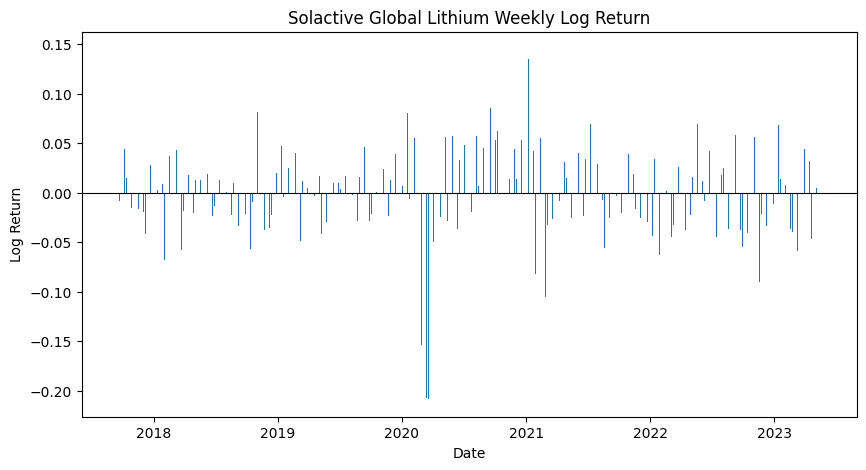

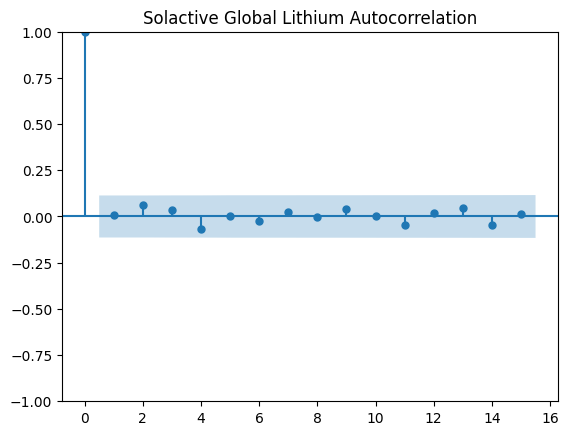

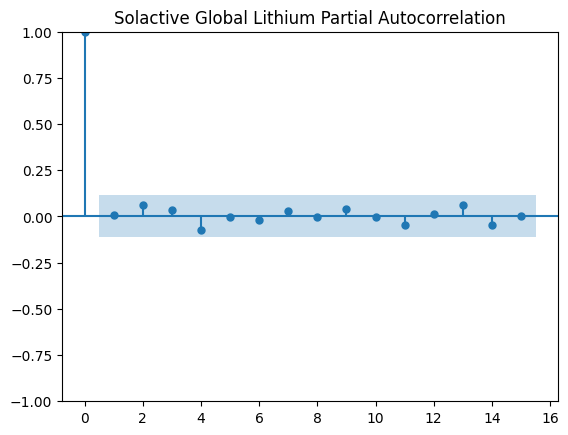

In [12]:
# Solactive Global Lithium

sollit = pd.read_csv('./Data/SOLLIT.csv', usecols=[0,1])
sollit.set_index('Date', inplace = True)
sollit.rename(columns = {'Close': 'Price'}, inplace = True)
sollit.index = pd.to_datetime(sollit.index)
sollit = sollit.sort_index()
sollit['Price'] = sollit['Price'].apply(str_to_num)
sollit.replace(to_replace = 0, method = 'ffill', inplace = True) # fill 0 with previous value
sollit = sollit[sollit.index.dayofweek == 4] # Friday
sollit = sollit[sollit.index.isin(pd.date_range('2017-09-08', '2023-05-22'))]

sollit['log_ret'] = np.log(sollit.Price).diff() # Weekly log return
sollit = sollit.tail(-1) # Delete first row (log_ret = NaN)

# sollit.to_csv('sollit.csv')
# display(sollit)

fig, axs = plt.subplots(1, 1, figsize =(10, 5))
axs.bar(sollit.index, sollit.log_ret, width = 1.5)
plt.axhline(0, linewidth = 0.8, color = 'k')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.title('Solactive Global Lithium Weekly Log Return')
plt.show()

acf = plot_acf(sollit['log_ret'], lags=15, alpha=0.05, title='Solactive Global Lithium Autocorrelation')
pacf = plot_pacf(sollit['log_ret'], lags=15, alpha=0.05, method='ywm', title='Solactive Global Lithium Partial Autocorrelation')